In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
col_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv('ml-100k/u.data',sep = '\t',names = col_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
movie_title = pd.read_csv('ml-100k/u.item',sep = '\|',header=None)

In [7]:
movie_title.shape

(1682, 24)

In [8]:
movie_title = movie_title[[0,1]]

In [9]:
movie_title.columns = ['item_id','title']
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df = pd.merge(df,movie_title,on = "item_id")

In [11]:
df.tail(15)

,user_id,item_id,rating,timestamp,title
99985,655,1638,3,887488947,Normal Life (1996)
99986,782,1667,3,891500110,"Next Step, The (1995)"
99987,851,1675,3,884222085,"Sunchaser, The (1996)"
99988,234,1460,3,892335460,Sleepover (1995)
99989,532,1594,4,893115576,Everest (1998)
99990,416,1594,5,893212484,Everest (1998)
99991,648,1626,1,884795447,Nobody Loves Me (Keiner liebt mich) (1994)
99992,655,1645,4,892871225,"Butcher Boy, The (1998)"
99993,747,1659,1,888733313,Getting Away With Murder (1996)
99994,916,1682,3,880845755,Scream of Stone (Schrei aus Stein) (1991)


# Exploratory Data Analysis

In [14]:
# No of unique movies:
no_of_movies = df['item_id'].nunique()
print("Uniques movies : " + str(no_of_movies))

# No of unique users:
no_of_users = df['user_id'].nunique()
print("Unique Users : " + str(no_of_users))

Uniques movies : 1682
Unique Users : 943


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
movie_ratings = pd.DataFrame(df.groupby('title').mean()['rating'].sort_values(ascending = False))

In [28]:
freq_movie = pd.DataFrame(df.value_counts('title'))

In [27]:
movie_ratings

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [29]:
freq_movie

,0
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [30]:
movie_freqAndratings = pd.merge(movie_ratings,freq_movie,on = 'title')

In [31]:
movie_freqAndratings

,rating,0
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [40]:
movie_freqAndratings.rename(columns = {movie_freqAndratings.columns[1] : 'No of Users'},inplace=True)
movie_freqAndratings.head(30)

,rating,No of Users
title,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


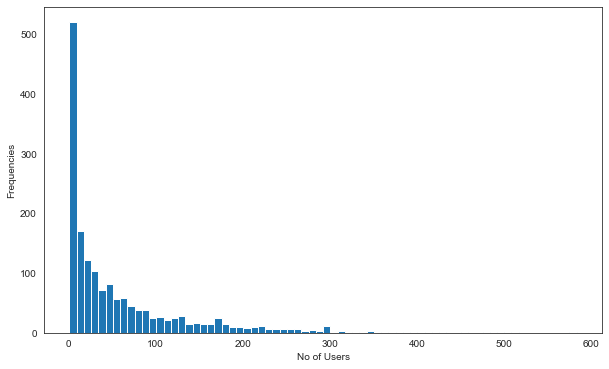

In [45]:
# So we see that the higly rated and the lowly rated movies have been watched by very few people.
# To Visualize:
sns.set_style('white')
plt.figure(figsize=(10,6))
plt.hist(movie_freqAndratings['No of Users'],bins = 70)
plt.xlabel("No of Users")
plt.ylabel("Frequencies")
plt.show()

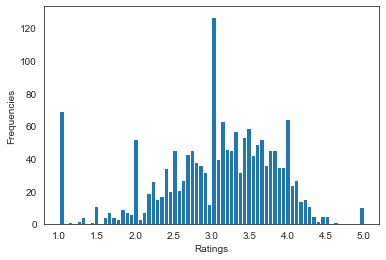

In [46]:
plt.hist(movie_freqAndratings['rating'],bins = 70)
plt.xlabel("Ratings")
plt.ylabel("Frequencies")
plt.show()

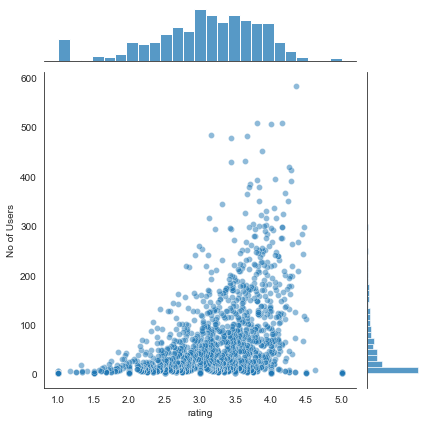

In [47]:
sns.jointplot(x = 'rating',y = 'No of Users',data = movie_freqAndratings,alpha = 0.5)

# Creating Movie Recommendations

In [48]:
movie_freqAndratings.head()

,rating,No of Users
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [49]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [62]:
movie_matrix = df.pivot_table(index = 'user_id',columns='title',values = 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [61]:
movie_freqAndratings.sort_values('No of Users',ascending=False).head()

,rating,No of Users
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [63]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [64]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [67]:
# NaN values above shows that there were no person who rated both-starwars and the movie for which we
# got the NaN values
correlated_to_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [69]:
correlated_to_starwars.dropna(inplace = True)

In [70]:
correlated_to_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [72]:
# We'll suggest that movie which has the highest correlation to ,say,starwars.
# to get the top 10 highly correlated movies:
correlated_to_starwars.sort_values('correlation',ascending = False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [74]:
# But it may happen that a few people have watched both the movies and gave the smae stars to both
# which makes them highly correlated.We do not want such movies.We want those that are
# watched by atleast,say,100 people and are highly correlated.Suggesting those movies will make sense.
correlated_to_starwars = correlated_to_starwars.join(movie_freqAndratings['No of Users'])
correlated_to_starwars.head()

,correlation,No of Users
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [77]:
correlated_to_starwars[correlated_to_starwars['No of Users']  > 100].sort_values('correlation',ascending=False)

,correlation,No of Users
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


This is how we can recommend a movie. 
We can make it interactive by writing a function and taking user input.

## Predict Function:

In [78]:
def recommend_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_movies = movie_matrix.corrwith(movie_user_ratings)
    correlated_movies = pd.DataFrame(similar_movies,columns=['correlation'])
    correlated_movies.dropna(inplace = True)
    correlated_movies = correlated_movies.join(movie_freqAndratings['No of Users'])
    recommended_movies = correlated_movies[correlated_movies['No of Users']  > 100].sort_values('correlation',ascending=False)
    
    return recommended_movies

In [81]:
movies_to_watch = recommend_movies("101 Dalmatians (1996)")

In [82]:
movies_to_watch.head()

,correlation,No of Users
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150


In [83]:
movies_to_watch = recommend_movies("Liar Liar (1997)")
movies_to_watch.head(10)

,correlation,No of Users
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
